In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [5]:
boston = datasets.load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [11]:
# df_boston.head()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [12]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [37]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Q2: Use different histograms to plot features that have right, left and zero skew.

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

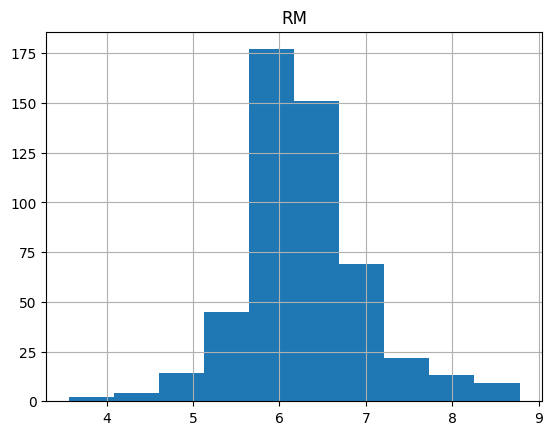

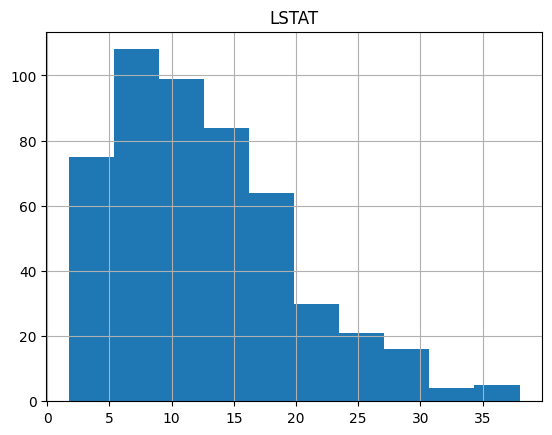

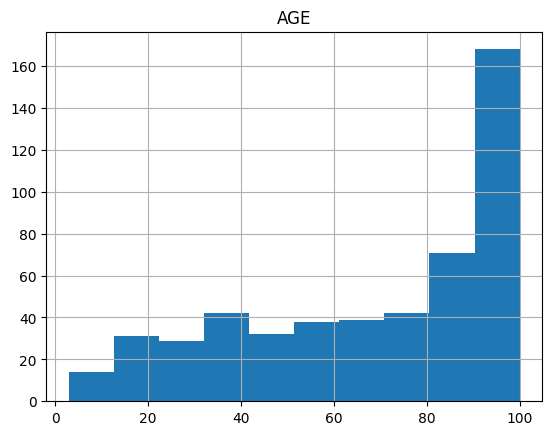

In [38]:
#zero=rm 
df_boston.hist('RM')
#right=Lstat
df_boston.hist('LSTAT')
#left=age
df_boston.hist('AGE')

## Q3: Prove your previous result using mean, median and mode.

In [26]:
import numpy as np
import pandas as pd
from scipy import stats


In [30]:
#zero mean=median=!mode 
#there is no variable all central tendcy are equal but RM the median and mean are equal 

print(np.mean(df_boston['RM']))
print(np.median(df_boston['RM']))
print(stats.mode(df_boston['RM']))

6.284634387351787
6.2085
ModeResult(mode=array([5.713]), count=array([3]))


In [29]:
#right mean>median>mode

print(np.mean(df_boston['LSTAT']))
print(np.median(df_boston['LSTAT']))
print(stats.mode(df_boston['LSTAT']))

12.653063241106723
11.36
ModeResult(mode=array([6.36]), count=array([3]))


In [32]:
#right mean<median<mode

print(np.mean(df_boston['AGE']))
print(np.median(df_boston['AGE']))
print(stats.mode(df_boston['AGE']))

68.57490118577078
77.5
ModeResult(mode=array([100.]), count=array([43]))


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [40]:
df_boston.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

## Q5: Use numpy to draw normal distribution.

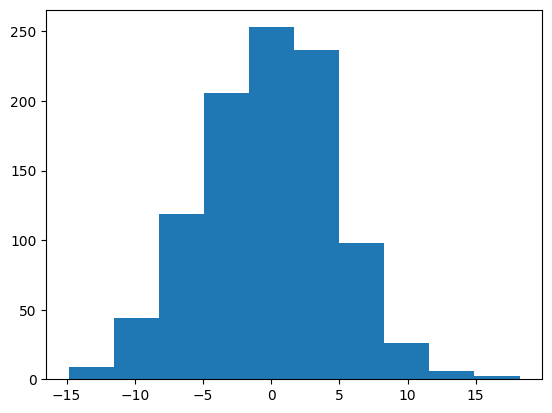

In [63]:
import matplotlib.pyplot as plt
#random.normal(loc=0.0, scale=1.0, size=None)
random = np.random.normal(0,5, 1000)
plt.hist(random);


## Q6: Use numpy to draw uniform distribution.

(array([108.,  95., 110., 103., 103., 106.,  84.,  95.,  96., 100.]),
 array([1.00760945, 1.50641282, 2.00521619, 2.50401956, 3.00282293,
        3.50162631, 4.00042968, 4.49923305, 4.99803642, 5.49683979,
        5.99564316]),
 <BarContainer object of 10 artists>)

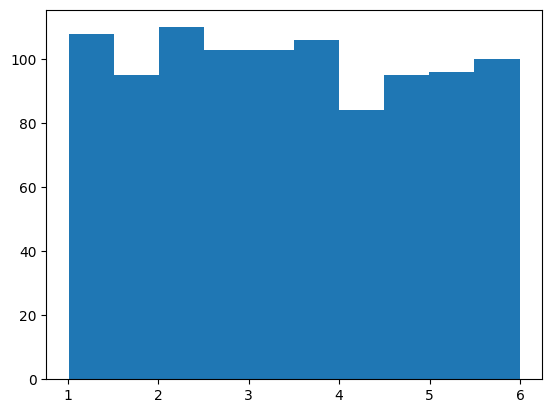

In [61]:
#random.uniform(low=0.0, high=1.0, size=None)
uniform= np.random.uniform(1,6,1000)
plt.hist(uniform)

## Q7: Use numpy to draw binomial distribution.

(array([ 8.,  7.,  5., 10.,  9., 30., 11.,  9.,  9.,  2.]),
 array([34. , 35.2, 36.4, 37.6, 38.8, 40. , 41.2, 42.4, 43.6, 44.8, 46. ]),
 <BarContainer object of 10 artists>)

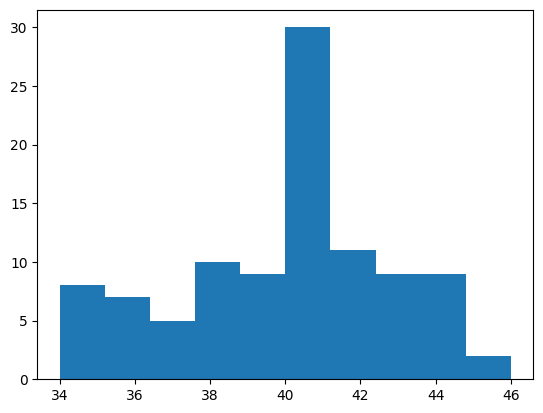

In [68]:
#random.binomial(n, p, size=None)
binomial=np.random.binomial(50,0.8, size=100)
plt.hist(binomial)

## Q8: Simulate Two Coin Flips, then draw the result distribution.

(array([1., 0., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

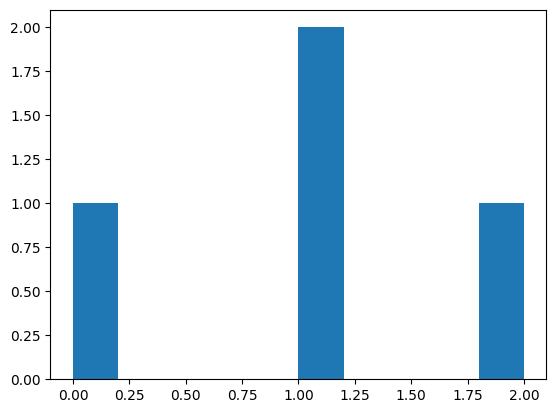

In [191]:

x=['HH','HT','TH','TT']
y=[x.count('H') for x in x]
plt.hist(y)

In [167]:
np.random.randint(0,2)

0

## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [74]:
stats.describe(df_boston)

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [72]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

In [76]:
'''
z: Sample size  large,std ,for population unknown,normal distrbution
t: Sample size small n<30 ,std for population unknown,student t distrbution
data points are independent. Normal Distribution for Z the average = zero and variance = 1
'''

'\nz: Sample size  large,std ,for population unknown,normal distrbution\nt: Sample size small n<30 ,std for population unknown,student t distrbution\ndata points are independent. Normal Distribution for Z the average = zero and variance = 1\n'

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [89]:
#alpha=0.05,xbar=80,n=50,standard devation=10 , mu=70
#1)hypothesis
#H0: Null Hypothesis: mu =70
#H1: Alternative Hypothesis: mu>70 (This is what we want to prove.)
#2)test statistics
#z=xbar-mu/(siqma/sqrt(n))
z=(80-70)/(10/np.sqrt(50))
#reject H0 if z>1.649 
if z>1.469:
    print('mu>70')

mu>70


An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [97]:
#n=30 xbar=60,std=20,mu=30,df=n-1=29 > table value =2.045
#1)hypothesis
#H0: Null Hypothesis: mu=30
#H1: Alternative Hypothesis: mu>30 (This is what we want to prove.)
#t=xbar-mu/(s/sqrt(n))
t=(60-30)/(20/np.sqrt(30))
#reject H0 if t>table value
table_value =2.045
if (t>table_value):
    print ('reject H0 a training program increase sales')

reject H0 a training program increase sales
